In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier, plot_importance

In [9]:
df_train = pd.read_csv('application_train.csv')

In [10]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X_test = pd.read_csv('application_test.csv')

### Run this cell for mem checks

In [12]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('df_train', 570142137),
 ('X_test', 90020943),
 ('Imputer', 1056),
 ('KFold', 1056),
 ('StandardScaler', 1056),
 ('StratifiedKFold', 1056),
 ('XGBClassifier', 1056),
 ('accuracy_score', 136),
 ('auc', 136),
 ('confusion_matrix', 136),
 ('cross_val_score', 136),
 ('make_pipeline', 136),
 ('plot_importance', 136),
 ('precision_score', 136),
 ('recall_score', 136),
 ('roc_auc_score', 136),
 ('roc_curve', 136),
 ('train_test_split', 136),
 ('np', 80),
 ('pd', 80),
 ('plt', 80),
 ('sns', 80)]

In [13]:
X = df_train.drop(['TARGET'], axis=1)
y = df_train['TARGET']

### Find columns with nulls

In [14]:
columns_null = X.columns[X.count() != 307511]
columns_null

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [15]:
X[columns_null].count()/307511

AMT_ANNUITY                     0.999961
AMT_GOODS_PRICE                 0.999096
NAME_TYPE_SUITE                 0.995799
OWN_CAR_AGE                     0.340092
OCCUPATION_TYPE                 0.686545
CNT_FAM_MEMBERS                 0.999993
EXT_SOURCE_1                    0.436189
EXT_SOURCE_2                    0.997854
EXT_SOURCE_3                    0.801747
APARTMENTS_AVG                  0.492503
BASEMENTAREA_AVG                0.414840
YEARS_BEGINEXPLUATATION_AVG     0.512190
YEARS_BUILD_AVG                 0.335022
COMMONAREA_AVG                  0.301277
ELEVATORS_AVG                   0.467040
ENTRANCES_AVG                   0.496512
FLOORSMAX_AVG                   0.502392
FLOORSMIN_AVG                   0.321514
LANDAREA_AVG                    0.406233
LIVINGAPARTMENTS_AVG            0.316450
LIVINGAREA_AVG                  0.498067
NONLIVINGAPARTMENTS_AVG         0.305670
NONLIVINGAREA_AVG               0.448208
APARTMENTS_MODE                 0.492503
BASEMENTAREA_MOD

### Inspect number of values in each categorical col

Some categorical columns are incorrectly coded as int64.  Convert them to objects.

In [16]:
df_train.FLAG_MOBIL.value_counts()

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

In [17]:
y.mean()

0.08072881945686496

In [18]:
#examine very lopsided cols to see if we can just remove them
import re
for col in df_train.columns:
    if re.search(r'FLAG', col):
        if df_train[col].value_counts().min()/df_train[col].value_counts().max() < .001:
            min_msk = df_train[col] == df_train[col].value_counts().argmin()
            print(col, df_train[col].value_counts().min(), y[min_msk].mean())

/home/goodwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  


FLAG_MOBIL 1 0.0
FLAG_DOCUMENT_2 13 0.3076923076923077
FLAG_DOCUMENT_4 25 0.0
FLAG_DOCUMENT_7 59 0.05084745762711865
FLAG_DOCUMENT_10 7 0.0
FLAG_DOCUMENT_12 2 0.0
FLAG_DOCUMENT_17 82 0.024390243902439025
FLAG_DOCUMENT_19 183 0.06557377049180328
FLAG_DOCUMENT_20 156 0.08333333333333333
FLAG_DOCUMENT_21 103 0.13592233009708737


flag doc 2, 21, 82, and 4(maybe) look important

In [19]:
#drop columns that don't have much info
X.drop(columns=['FLAG_MOBIL', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12'], inplace=True, errors='ignore')
X_test.drop(columns=['FLAG_MOBIL', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12'], inplace=True, errors='ignore')

### Visualize

In [20]:
# for col in df_train.columns[2:]:
#     try:
#         g = sns.FacetGrid(df_train[[col, 'TARGET']], hue='TARGET')
#         g = g.map(plt.hist, col)
#     except:
#         pass

In [21]:
y[X.DAYS_EMPLOYED > 0].mean()

0.05399646043269404

seems like it has an effect on target, so let's replace this with NaN and create new col that flags any weird number in this col

In [22]:
X['DAYS_EMPLOYED_ABNORMAL'] = (X['DAYS_EMPLOYED'] > 0).astype(int)
X_test['DAYS_EMPLOYED_ABNORMAL'] = (X_test['DAYS_EMPLOYED'] > 0).astype(int)

In [23]:
X['DAYS_EMPLOYED'][X['DAYS_EMPLOYED'] > 0] = np.nan
X_test['DAYS_EMPLOYED'][X_test['DAYS_EMPLOYED'] > 0] = np.nan

/home/goodwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/goodwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
X['DAYS_EMPLOYED'].isnull().sum(), X_test['DAYS_EMPLOYED'].isnull().sum()

(55374, 9274)

### Imputation

In [25]:
# X_imputed = X.fillna(X.mean(numeric_only=True))

In [26]:
# X_imputed = X_imputed.fillna(X_imputed.mode().iloc[0])

In [27]:
#check to see if any null values in entire DF
# X_imputed.isnull().sum().sum()

In [28]:
# X_imputed['REGION_RATING_CLIENT'] = X_imputed['REGION_RATING_CLIENT'].astype(object)
# X_imputed['REGION_RATING_CLIENT_W_CITY'] = X_imputed['REGION_RATING_CLIENT_W_CITY'].astype(object)

In [29]:
# X_imputed = pd.get_dummies(X_imputed)

In [30]:
X['REGION_RATING_CLIENT'] = X['REGION_RATING_CLIENT'].astype(object)
X['REGION_RATING_CLIENT_W_CITY'] = X['REGION_RATING_CLIENT_W_CITY'].astype(object)
X_test['REGION_RATING_CLIENT'] = X_test['REGION_RATING_CLIENT'].astype(object)
X_test['REGION_RATING_CLIENT_W_CITY'] = X_test['REGION_RATING_CLIENT_W_CITY'].astype(object)

In [31]:
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

In [37]:
df_train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [34]:
[print(col) for col in X.columns]

SK_ID_CURR
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_ME

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

### Feature Engineering

In [25]:
X['CONSUMER'] = (X['AMT_CREDIT'] == X['AMT_GOODS_PRICE']).astype(int)
X_test['CONSUMER'] = (X_test['AMT_CREDIT'] == X_test['AMT_GOODS_PRICE']).astype(int)

In [26]:
X['TERM'] = X['AMT_CREDIT'] / X['AMT_ANNUITY']
X_test['TERM'] = X_test['AMT_CREDIT'] / X_test['AMT_ANNUITY']

In [27]:
X['ANNUITY_PER_INCOME'] = X['AMT_ANNUITY'] / X['AMT_INCOME_TOTAL']
X_test['ANNUITY_PER_INCOME'] = X_test['AMT_ANNUITY'] / X_test['AMT_INCOME_TOTAL']

In [28]:
X, X_test = X.align(X_test, axis=1, join='inner')

### Merge with original dataframe (train and test)

In [29]:
X.shape, X_test.shape

((307511, 247), (48744, 247))

In [30]:
features_bureau_df = pd.read_pickle('features_bureau.pkl')
features_bureau_test_df = pd.read_pickle('features_bureau_test.pkl')
X = pd.concat([X, features_bureau_df.add_suffix('_bur')], axis=1)
X_test = pd.concat([X_test, features_bureau_test_df.add_suffix('_bur')], axis=1)
X.shape, X_test.shape

((307511, 284), (48744, 284))

In [31]:
features_prev_df = pd.read_pickle('features_prev.pkl')
features_prev_test_df = pd.read_pickle('features_prev_test.pkl')
X = pd.concat([X, features_prev_df.add_suffix('_prev')], axis=1)
X_test = pd.concat([X_test, features_prev_test_df.add_suffix('_prev')], axis=1)
X.shape, X_test.shape

((307511, 449), (48744, 449))

In [32]:
features_install_df = pd.read_pickle('features_install.pkl')
features_install_test_df = pd.read_pickle('features_install_test.pkl')
X = pd.concat([X, features_install_df.add_suffix('_install')], axis=1)
X_test = pd.concat([X_test, features_install_test_df.add_suffix('_install')], axis=1)
X.shape, X_test.shape

((307511, 457), (48744, 457))

In [33]:
features_pos_df = pd.read_pickle('features_pos.pkl')
features_pos_test_df = pd.read_pickle('features_pos_test.pkl')
X = pd.concat([X, features_pos_df.add_suffix('_pos')], axis=1)
X_test = pd.concat([X_test, features_pos_test_df.add_suffix('_pos')], axis=1)
X.shape, X_test.shape

((307511, 483), (48744, 483))

In [34]:
features_cc_df = pd.read_pickle('features_cc.pkl')
features_cc_test_df = pd.read_pickle('features_cc_test.pkl')
X = pd.concat([X, features_cc_df.add_suffix('_cc')], axis=1)
X_test = pd.concat([X_test, features_cc_test_df.add_suffix('_cc')], axis=1)
X.shape, X_test.shape

((307511, 520), (48744, 520))

In [35]:
# corrs = pd.Series([y.corr(X[col]) for col in X.columns], index=X.columns).sort_values()
# corrs

In [36]:
# corrs = abs(corrs).sort_values(ascending=False)

### Testing section

In [37]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

Let's write our own cross validation loop so we train only on a small portion of the data.  We'll validate on a much larger set than we train on.

In [38]:
pipe = make_pipeline(XGBClassifier(random_state=0))

In [39]:
# hack so we can train on the smaller set and validate on the larger_set, let's only do it for the first K splits
K = 3
cv_scores = []
for val_ind, tr_ind in kf.split(X,y):
    pipe.fit(X.iloc[tr_ind], y.iloc[tr_ind])
    cv_scores.append(roc_auc_score(y.iloc[val_ind], pipe.predict_proba(X.iloc[val_ind])[:,1]))
    
    K -= 1
    if K < 1:
        break

In [40]:
cv_scores

[0.7651623777819825, 0.7615830152380761, 0.7613576036642078]

In [41]:
pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('xgbclassifier', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [42]:
y_pred = pipe.predict_proba(X_test)

,SK_ID_CURR,TARGET
0,100001,0.062734
1,100005,0.130615
2,100013,0.023169
3,100028,0.040770
4,100038,0.138776
5,100042,0.058923
6,100057,0.021726
7,100065,0.049336
8,100066,0.024484
9,100067,0.105692


In [50]:
pd.concat([X_test.iloc[:,0], pd.DataFrame(y_pred[:, 1])], axis=1).rename(columns={0:'TARGET'}).to_csv('submission.csv', index=False)

In [43]:
importances = pd.Series(pipe.get_params()['xgbclassifier'].feature_importances_, index=X.columns).sort_values(ascending=False)
importances[importances > 0]

EXT_SOURCE_2                                           0.124286
EXT_SOURCE_3                                           0.115714
EXT_SOURCE_1                                           0.080000
TERM                                                   0.045714
DAYS_EMPLOYED                                          0.042857
AVG_AMT_SHORT_install                                  0.030000
AMT_PAYMENT_install                                    0.025714
CNT_DRAWINGS_ATM_CURRENT_AVG_cc                        0.024286
NAME_CONTRACT_STATUS_Refused_prev                      0.022857
DAYS_BIRTH                                             0.021429
CNT_INSTALMENT_MAX_pos                                 0.020000
CODE_GENDER_M                                          0.020000
INSTALMENTS_REMAINING_pos                              0.017143
AMT_CREDIT_SUM_bur                                     0.017143
AMT_DOWN_PAYMENT_prev                                  0.015714
AMT_ANNUITY                             

In [44]:
pipe.get_params()['xgbclassifier'].get_booster().get_score(importance_type='gain')

{'EXT_SOURCE_3': 392.3518568728395,
 'EXT_SOURCE_2': 331.1930061287356,
 'DAYS_EMPLOYED': 164.27722223333336,
 'EXT_SOURCE_1': 152.12432169642855,
 'CREDIT_TYPE_Microloan_bur': 83.30167385,
 'CODE_GENDER_M': 170.48031125000003,
 'CNT_DRAWINGS_ATM_CURRENT_AVG_cc': 146.036596,
 'CODE_GENDER_F': 74.6333008,
 'PERCENT_DRAW_LIMIT_cc': 156.72110306,
 'PERCENT_DRAW_ATM_LIMIT_cc': 61.27352906666667,
 'DAYS_BIRTH': 110.69773553999998,
 'AVG_AMT_SHORT_install': 145.12503057142857,
 'NAME_EDUCATION_TYPE_Higher education': 272.14054112499997,
 'DAYS_FIRST_DRAWING_prev': 170.12020096,
 'MONTHS_BALANCE_MIN_pos': 92.60632288999999,
 'DAYS_LAST_DUE_1ST_VERSION_prev': 104.53614151428573,
 'AMT_PAYMENT_install': 99.16240983888889,
 'AMT_DOWN_PAYMENT_prev': 191.2233743636364,
 'NAME_PAYMENT_TYPE_XNA_prev': 24.7948494,
 'CNT_INSTALMENT_MAX_pos': 100.81262353571427,
 'AMT_SHORT_PAYMENT_install': 98.2944336,
 'AMT_PAYMENT_TOTAL_CURRENT_cc': 90.0853271,
 'TERM_prev': 57.096524439999996,
 'AMT_CREDIT_SUM_bur'

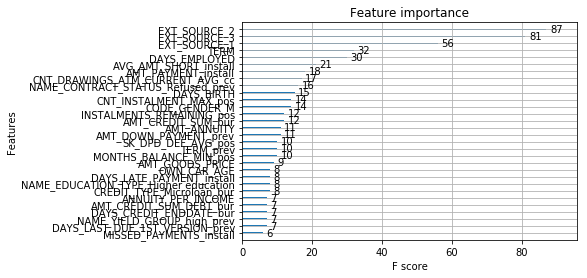

In [45]:
plot_importance(pipe.get_params()['xgbclassifier'], max_num_features=30)

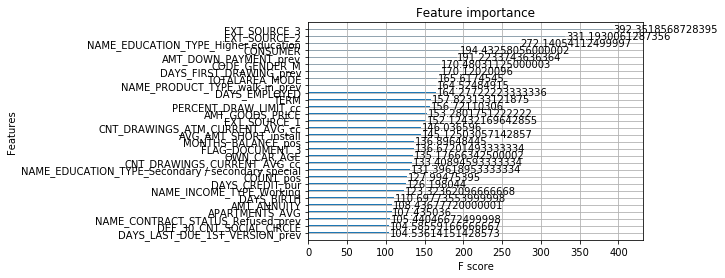

In [46]:
plot_importance(pipe.get_params()['xgbclassifier'], max_num_features=30, importance_type='gain')

In [ ]:
def plotROC(model, X_test, y_test):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [ ]:
plotROC(pipe, X[features].values, y.values)
plt.savefig('ROC.png')

In [ ]:
importances[:10]

In [ ]:
importances[:10][::-1].plot.barh(edgecolor='k', grid=True)
plt.xlabel('Feature Importance')
plt.savefig('featureimportance.png')